In [29]:
#setting up environment to carry out exploratory analysis on data from helsinki trams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
https://iot.fvh.fi/opendata/sporametri/processed_data/readme-processed_data.txt
    # Sporametri Air Quality data

This directory contains data of Sporametri Air Quality sensors. Total 4 sets of measuring devices were used. Three of them were installed on trams driving on the streets of Helsinki.
One set was located on HSY MÃ¤kelÃ¤nkatu (supersite) measuring station.  The data collected from the sites moving with trams are named sporametri-movingsites-data*.
And those collected at MÃ¤kelÃ¤nkatu supersite sporametri-supersite-data*.

Data has been collected between February 2019 and August 2019. Data has been divided in files based on month of timestamp.

All data is in gzipped CSV format sporametri-movingsites-data0419.csv.gz, which looks like this sample below:

timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
1554085919,2,0.0,0.0,,,,,101672.0,45.637,18.56,
1554085919,2,0.0,0.0,4.59344,-0.43572799999999995,,,101671.0,45.655,18.66,
1554085920,2,0.0,0.0,4.5344,-0.397408,,,101667.0,45.571000000000005,18.65,
1554085921,2,0.0,0.0,4.4319999999999995,-0.481392,,,101667.0,45.53,18.65,
1554085922,2,0.0,0.0,4.37784,-0.4968,,,101671.0,45.486999999999995,18.67,
1554085923,2,0.0,0.0,4.30096,-0.54952,,,101670.0,45.431000000000004,18.69,
1554085924,2,0.0,0.0,4.23808,-0.40257600000000004,,,101670.0,45.375,18.71,
1554085925,2,0.0,0.0,4.17208,-0.457136,,,101669.0,45.306999999999995,18.72,
1554085926,2,0.0,0.0,4.08016,-0.467712,,,101667.0,45.25,18.73,

The columns are:
timestamp = time in seconds (starting from '1970-01-01 00:00:00')
spora-id = specifying the tram in which the devices were installed
latitude = latitude coordinate
longitude = longitude coordinate
NO = nitric oxide
NO2 = nitrogen dioxide
O3 = ozone
CO = carbon oxide
BME680_pressure = air pressure measured using BME680 sensor
BME680_humidity = humidity measured using BME680 sensor
BME680_temperature = temperature measured using BME680 sensor
comment

In [66]:
#Read csv data
df = pd.read_csv('sporametri-movingsites.csv')
#explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630660 entries, 0 to 630659
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           630660 non-null  int64  
 1   spora-id            630660 non-null  int64  
 2   latitude            630660 non-null  float64
 3   longitude           630660 non-null  float64
 4   NO                  630660 non-null  float64
 5   NO2                 630660 non-null  float64
 6   O3                  630660 non-null  float64
 7   CO                  630660 non-null  float64
 8   BME680_pressure     630660 non-null  float64
 9   BME680_humidity     630660 non-null  float64
 10  BME680_temperature  630660 non-null  float64
 11  comment             0 non-null       float64
dtypes: float64(10), int64(2)
memory usage: 57.7 MB


In [ ]:
We observe that the datframe contains 12 columns that are integer and float types

In [67]:
#check the dataframe statistics
df.describe()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
count,6.306600e+05,630660.0,630660.000000,630660.000000,630660.000000,630660.000000,630660.000000,630660.000000,630660.000000,630660.000000,630660.000000,0.0
mean,1.551015e+09,2.0,60.180281,24.932184,0.000815,0.000815,0.000035,0.002319,101503.243320,26.498616,17.404508,NaN
std,2.257297e+05,0.0,0.014582,0.017584,0.017869,0.017869,0.001973,0.084945,1515.412594,5.725089,5.335992,NaN
min,1.550637e+09,2.0,60.150539,24.871277,-0.157000,-0.157000,-0.010900,-1.225000,98310.000000,11.770000,5.460000,NaN
25%,1.550819e+09,2.0,60.168877,24.922356,-0.010000,-0.010000,-0.000700,-0.044000,100307.000000,22.300000,12.940000,NaN
50%,1.551011e+09,2.0,60.181583,24.933348,0.000000,0.000000,0.000000,0.000000,101670.000000,25.900000,18.800000,NaN
75%,1.551209e+09,2.0,60.192799,24.947323,0.010000,0.010000,0.000700,0.045000,102560.000000,31.470000,20.440000,NaN
max,1.551398e+09,2.0,60.208572,24.975767,0.450000,0.450000,0.081100,2.122000,104266.000000,43.050000,32.000000,NaN


In [32]:
df.head()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
0,1550636934,2,60.162872,24.923164,0.009,0.009,0.0002,0.061,99055.0,23.76,29.35,NaN
1,1550636935,2,60.162838,24.923223,0.011,0.011,0.0001,0.055,99050.0,23.76,29.35,NaN
2,1550636936,2,60.162811,24.923281,0.011,0.011,0.0001,0.054,99048.0,23.75,29.35,NaN
3,1550636937,2,60.162781,24.923323,0.011,0.011,0.0000,0.053,99048.0,23.77,29.36,NaN
4,1550636938,2,60.162750,24.923347,0.011,0.011,0.0000,0.034,99058.0,23.75,29.35,NaN


In [68]:
#Let's drop the comment column
df = df.copy()
df.drop('comment', axis= 1)

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
0,1550636934,2,60.162872,24.923164,0.009,0.009,0.0002,0.061,99055.0,23.76,29.35
1,1550636935,2,60.162838,24.923223,0.011,0.011,0.0001,0.055,99050.0,23.76,29.35
2,1550636936,2,60.162811,24.923281,0.011,0.011,0.0001,0.054,99048.0,23.75,29.35
3,1550636937,2,60.162781,24.923323,0.011,0.011,0.0000,0.053,99048.0,23.77,29.36
4,1550636938,2,60.162750,24.923347,0.011,0.011,0.0000,0.034,99058.0,23.75,29.35
...,...,...,...,...,...,...,...,...,...,...,...
630655,1551398395,2,60.184448,24.922436,0.002,0.002,-0.0009,-0.041,100200.0,28.88,17.29
630656,1551398396,2,60.184444,24.922438,0.001,0.001,-0.0009,-0.041,100204.0,28.89,17.29
630657,1551398397,2,60.184444,24.922440,0.001,0.001,-0.0009,-0.052,100210.0,28.86,17.30
630658,1551398398,2,60.184444,24.922441,0.001,0.001,-0.0008,-0.054,100209.0,28.87,17.30


In [69]:
df.tail()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
630655,1551398395,2,60.184448,24.922436,0.002,0.002,-0.0009,-0.041,100200.0,28.88,17.29,NaN
630656,1551398396,2,60.184444,24.922438,0.001,0.001,-0.0009,-0.041,100204.0,28.89,17.29,NaN
630657,1551398397,2,60.184444,24.922440,0.001,0.001,-0.0009,-0.052,100210.0,28.86,17.30,NaN
630658,1551398398,2,60.184444,24.922441,0.001,0.001,-0.0008,-0.054,100209.0,28.87,17.30,NaN
630659,1551398399,2,60.184444,24.922441,-0.001,-0.001,-0.0007,-0.054,100209.0,28.86,17.30,NaN


In [ ]:
Let us now check if there is any null or missing data and make corrections if there is any

In [70]:
#checking if there is any missing data, The results above showed that there were no missing data. 
missing_data = df.isnull().any()
missing_data

timestamp             False
spora-id              False
latitude              False
longitude             False
NO                    False
NO2                   False
O3                    False
CO                    False
BME680_pressure       False
BME680_humidity       False
BME680_temperature    False
comment                True
dtype: bool

In [71]:
df['spora-id'].unique() # checking which tram id we have 

array([2], dtype=int64)

In [72]:
#Since we know that the data we collected is all from tram id (spora_id),2 we can simply drop the column
df = df.drop('spora-id',axis=1)
df

,timestamp,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
0,1550636934,60.162872,24.923164,0.009,0.009,0.0002,0.061,99055.0,23.76,29.35,NaN
1,1550636935,60.162838,24.923223,0.011,0.011,0.0001,0.055,99050.0,23.76,29.35,NaN
2,1550636936,60.162811,24.923281,0.011,0.011,0.0001,0.054,99048.0,23.75,29.35,NaN
3,1550636937,60.162781,24.923323,0.011,0.011,0.0000,0.053,99048.0,23.77,29.36,NaN
4,1550636938,60.162750,24.923347,0.011,0.011,0.0000,0.034,99058.0,23.75,29.35,NaN
...,...,...,...,...,...,...,...,...,...,...,...
630655,1551398395,60.184448,24.922436,0.002,0.002,-0.0009,-0.041,100200.0,28.88,17.29,NaN
630656,1551398396,60.184444,24.922438,0.001,0.001,-0.0009,-0.041,100204.0,28.89,17.29,NaN
630657,1551398397,60.184444,24.922440,0.001,0.001,-0.0009,-0.052,100210.0,28.86,17.30,NaN
630658,1551398398,60.184444,24.922441,0.001,0.001,-0.0008,-0.054,100209.0,28.87,17.30,NaN


In [ ]:
We also observe that data among the columns need to be normalized.
Then we will try to check if there are any types of correlations among the different features using pairplot function from seaborn.

In [73]:

#Normalize data to change values of numeric columns in the dataset to a common scale, without distoritng differences in the range values

df = (df - np.min(df)) / (np.max(df) - np.min(df)).values
df

,timestamp,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
0,0.000000,0.212517,0.496574,0.273476,0.273476,0.120652,0.384225,0.125084,0.383312,0.900151,NaN
1,0.000001,0.211931,0.497138,0.276771,0.276771,0.119565,0.382432,0.124244,0.383312,0.900151,NaN
2,0.000003,0.211466,0.497694,0.276771,0.276771,0.119565,0.382133,0.123909,0.382992,0.900151,NaN
3,0.000004,0.210949,0.498096,0.276771,0.276771,0.118478,0.381834,0.123909,0.383632,0.900528,NaN
4,0.000005,0.210415,0.498325,0.276771,0.276771,0.118478,0.376158,0.125588,0.382992,0.900151,NaN
...,...,...,...,...,...,...,...,...,...,...,...
630655,0.999995,0.584305,0.489607,0.261944,0.261944,0.108696,0.353750,0.317327,0.546995,0.445742,NaN
630656,0.999996,0.584237,0.489626,0.260297,0.260297,0.108696,0.353750,0.317999,0.547315,0.445742,NaN
630657,0.999997,0.584237,0.489645,0.260297,0.260297,0.108696,0.350463,0.319006,0.546355,0.446119,NaN
630658,0.999999,0.584237,0.489655,0.260297,0.260297,0.109783,0.349866,0.318838,0.546675,0.446119,NaN


In [74]:
df = df.drop('comment', axis= 1) #Let us drop the  comment column -- this should have been done earlier 

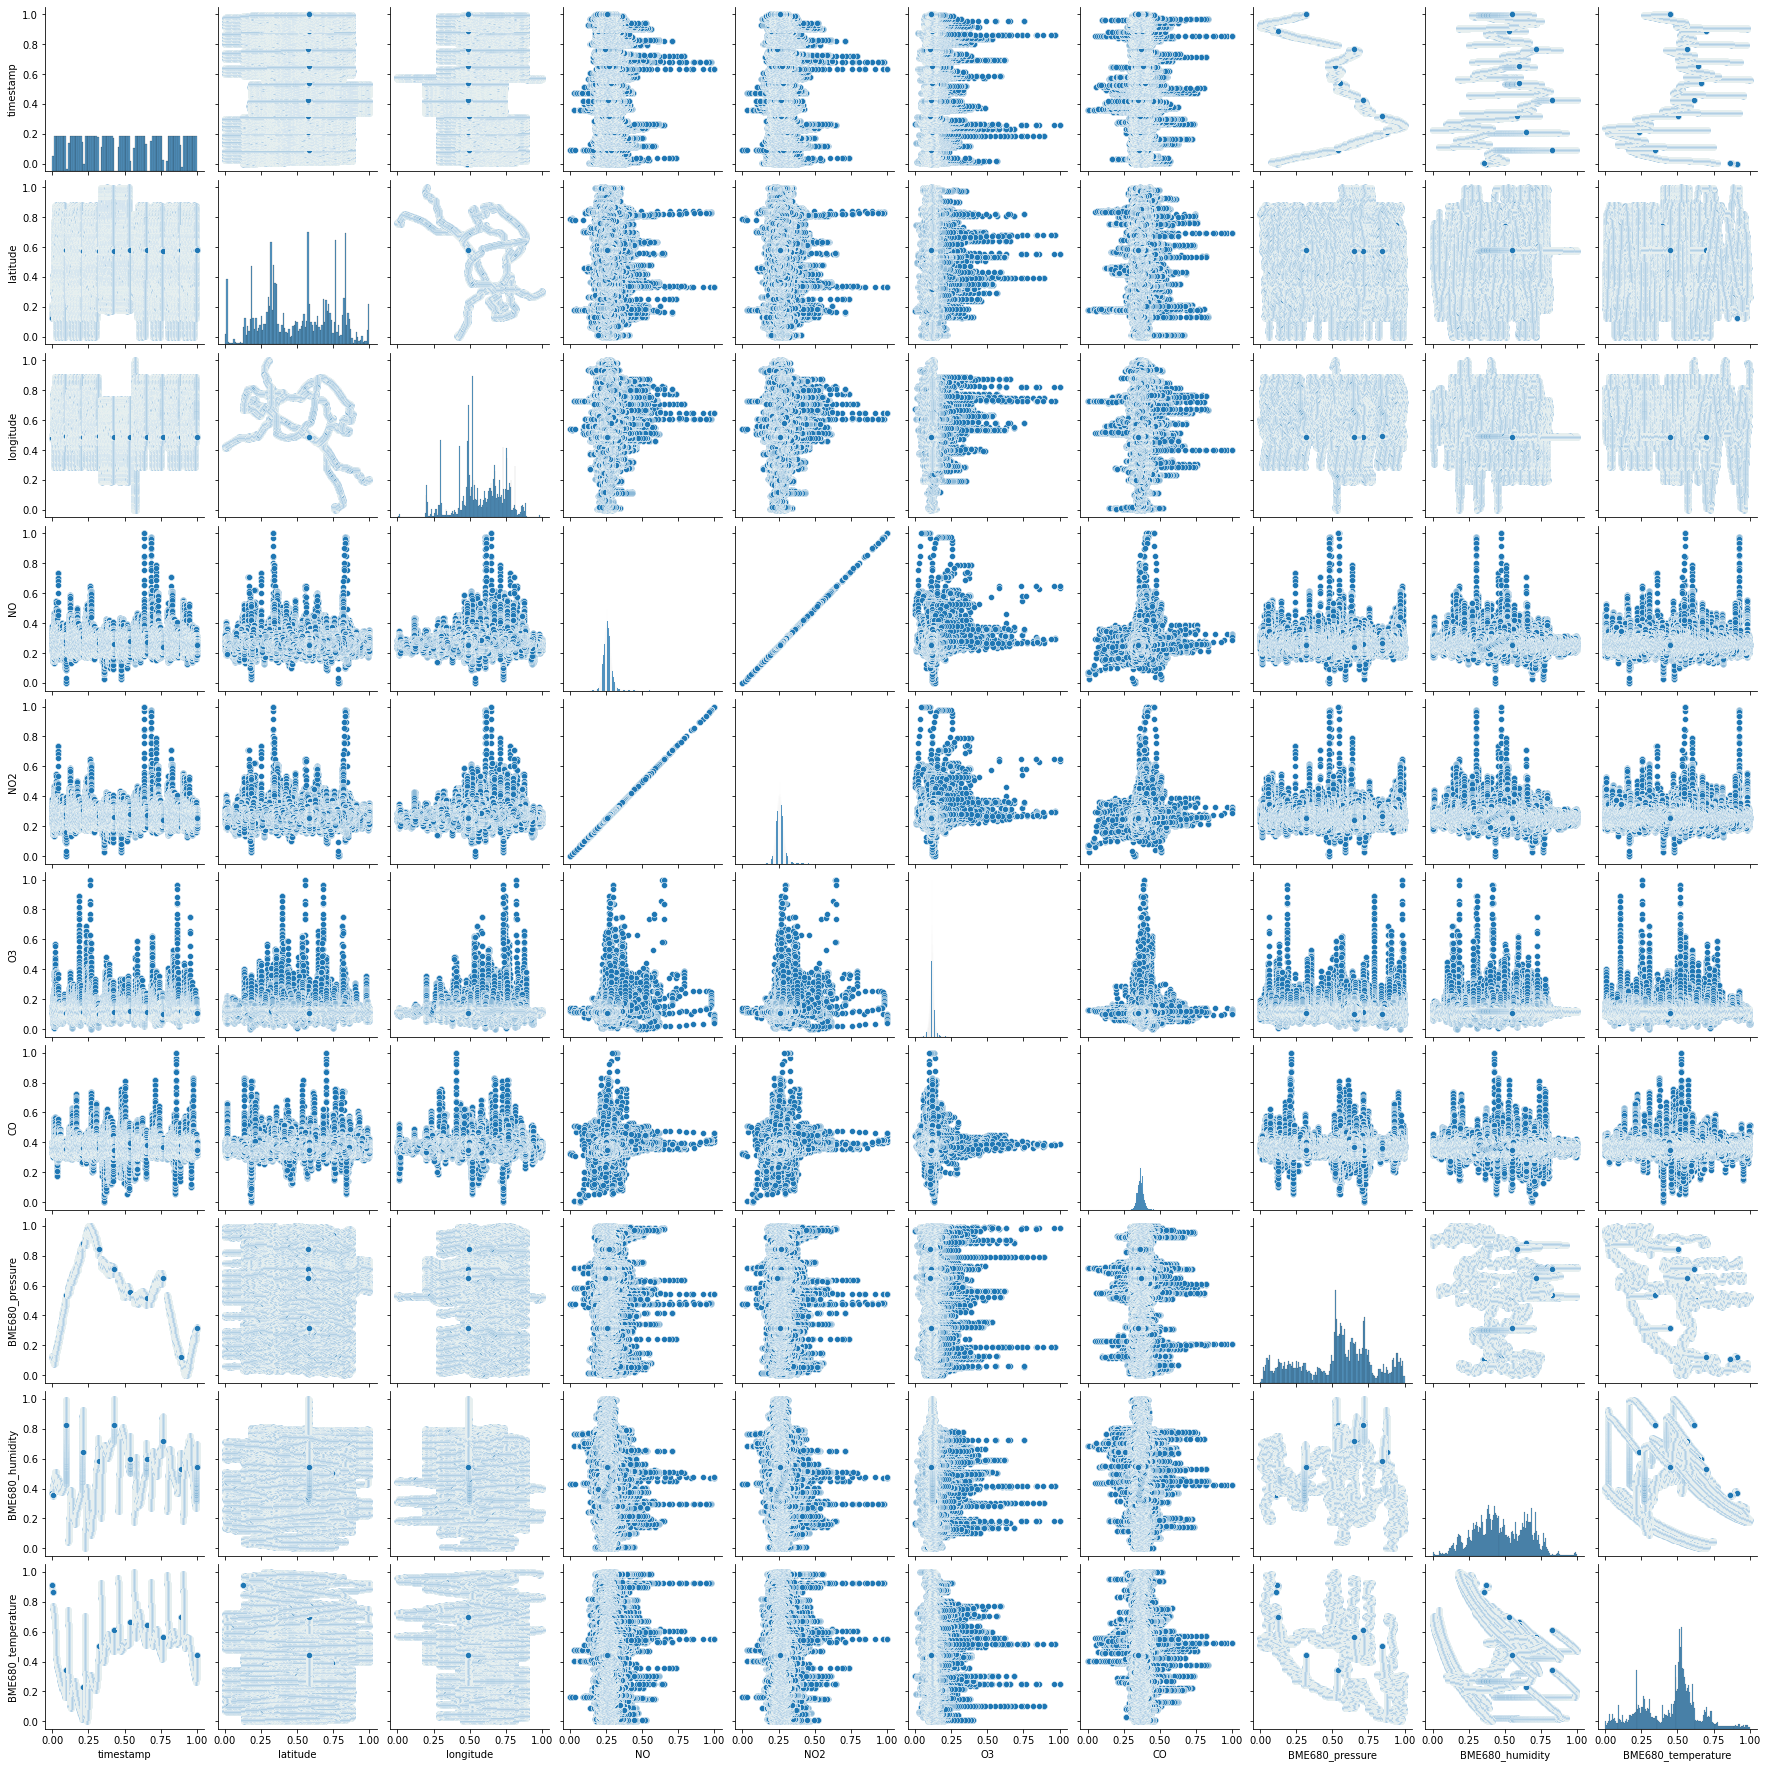

In [76]:
 #Now use pairplot function to check if there arenow use pairplot function to check if there are
sns.pairplot(df)

In [ ]:
From the plot above we can observe linear correlation between NO and NO2 emissions. 
We can also see that some specific geolocations (lattitude and longtiude) have highest NO,NO2 and CO emissions.